<a href="https://colab.research.google.com/github/rferina/ml_foundations_coursework/blob/main/Rachel_Ferina_Mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fungi Learning

## Description
Mushrooms are a fascinating group from the fungal kingdom of life. Despite the exciting properties that give them great biotechnological potential, they are relatively under-researched. Among their impressive usages, their applications in medicine are well documented and prolific. Mushrooms have also demonstrated remarkable abilities in breaking down pollutants and plastics and are a staple in diets all over the world.

The medical applications of mushrooms is something humans have been experimenting with for much of our history. They have been used for centuries in Chinese as antiviral and antibacterial agents as well as biofilm inhibitors. In modern medicine mushrooms have shown to be promising treatments against diabetes and cancer, among others, not to mention newer implications of psilocybin in treating PTSD and other psychological ailments.

Mushrooms have been a favorite food of humanity since we were a hunter gatherer society to this day. In a world strife with food insecurity Mushrooms act as an additional source of nutrition. Mushrooms add much flavor to food and are coveted in many high end restaurants. There are many mushrooms that we cannot cultivate and need to be scavenged from forests. As the number of vegetarians and vegans increase each year as well as many other special diets, mushrooms act as a meat replacement for people with food restrictions.

As the world continues to fill with chemical spills and other pollutants detrimental to the health of people, plants and animals alike the ability to deal with these issues grows more and more necessary. It has recently been shown that mushrooms and other fungi are excellent at breaking down a number of harsh chemicals and other pollutants. They could hold the secrets necessary for cleaning the environments that have been ravaged by our industrial waste.

Understanding more about mushrooms is necessary if we want to continue to gather benefits from them. In this project, we want to accurately predict the habitat and season of mushrooms based on mostly physical features through a machine learning model. This model will likely lead us to identify trends related to the evolutionary understanding of certain mushroom species, for example, if the mushroom's cap diameter makes it adapt better to humid habitats.


###Imports


In [ ]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import chisquare
# from dython.nominal import associations
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from scipy.spatial.distance import cdist
from scipy.stats import mode
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score


##Data Exploration

In [ ]:
mount_point = '/content/drive'
drive.mount(mount_point)

drive_dir = os.path.join(mount_point, "MyDrive")

Mounted at /content/drive


In [ ]:
dataset_dir = "Colab Notebooks/Mushrooms"
dataset_file = "secondary_data.csv"
mushroom_df = pd.read_csv(os.path.join(drive_dir, dataset_dir, dataset_file), sep=";")
mushroom_df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
mushroom_df.describe().T
#The numerical values arent too sparse, so we might not need to standarized or normalized

,count,mean,std,min,25%,50%,75%,max
cap-diameter,61069.0,6.733854,5.264845,0.38,3.48,5.86,8.54,62.34
stem-height,61069.0,6.581538,3.370017,0.00,4.64,5.95,7.74,33.92
stem-width,61069.0,12.149410,10.035955,0.00,5.21,10.19,16.57,103.91


In [ ]:

mushroom_df.describe()
n=mushroom_df.shape[0]


class MyFeat:

  def __init__(self, name, data):
    self.name = name
    self.data = data
    self.unique = data.nunique()
    self.NAs = data.isna().sum()
    self.n = data.shape[0]
    if data.nunique() > 15:
      self.mean = data.mean()
    else:
      self.mean = None

  def deets(self):
    print(f'{self.name}\t{self.unique}\t{self.NAs}\t{self.mean}\t{self.NAs/self.n}')

feats = list(mushroom_df.columns)
feato = []
for feat in feats:
  feat_obj = MyFeat(feat, mushroom_df[feat])
  feato.append(feat_obj)

feat_dict = {'name': [], 'unique': [], 'NAs': [],'NA_rate':[], 'usable_n':[]} #'mean': [], 'usable_n':[]}
for obj in feato:
  feat_dict['name'].append(obj.name)
  feat_dict['unique'].append(obj.unique)
  feat_dict['NAs'].append(obj.NAs)
  #feat_dict['mean'].append(obj.mean)
  feat_dict['NA_rate'].append(obj.NAs/obj.n)
  feat_dict['usable_n'].append(obj.n - obj.NAs)


feat_df = pd.DataFrame(feat_dict)

feat_df

,name,unique,NAs,NA_rate,usable_n
0,class,2,0,0.000000,61069
1,cap-diameter,2571,0,0.000000,61069
2,cap-shape,7,0,0.000000,61069
3,cap-surface,11,14120,0.231214,46949
4,cap-color,12,0,0.000000,61069
5,does-bruise-or-bleed,2,0,0.000000,61069
6,gill-attachment,7,9884,0.161850,51185
7,gill-spacing,3,25063,0.410405,36006
8,gill-color,12,0,0.000000,61069
9,stem-height,2226,0,0.000000,61069


In [ ]:
NA_row_rates = (mushroom_df.isna().sum(axis=1))/mushroom_df.shape[1] * 100
counts = NA_row_rates.value_counts().sort_index()
percentages = NA_row_rates.value_counts().sort_index()/n *100

for na_rate, count in counts.items():
    print(f"{na_rate:.2f}% missing values: {count} rows")

9.52% missing values: 1059 rows
14.29% missing values: 4236 rows
19.05% missing values: 12355 rows
23.81% missing values: 22945 rows
28.57% missing values: 15179 rows
33.33% missing values: 4942 rows
38.10% missing values: 353 rows


In [ ]:
#nunique, counts, season
mushroom_df["season"].value_counts()

a    30177
u    22898
w     5267
s     2727
Name: season, dtype: int64

In [ ]:
#nunique, counts habitat
mushroom_df["habitat"].value_counts()

d    44209
g     7943
l     3168
m     2920
h     2001
p      360
w      353
u      115
Name: habitat, dtype: int64

## Data visualization

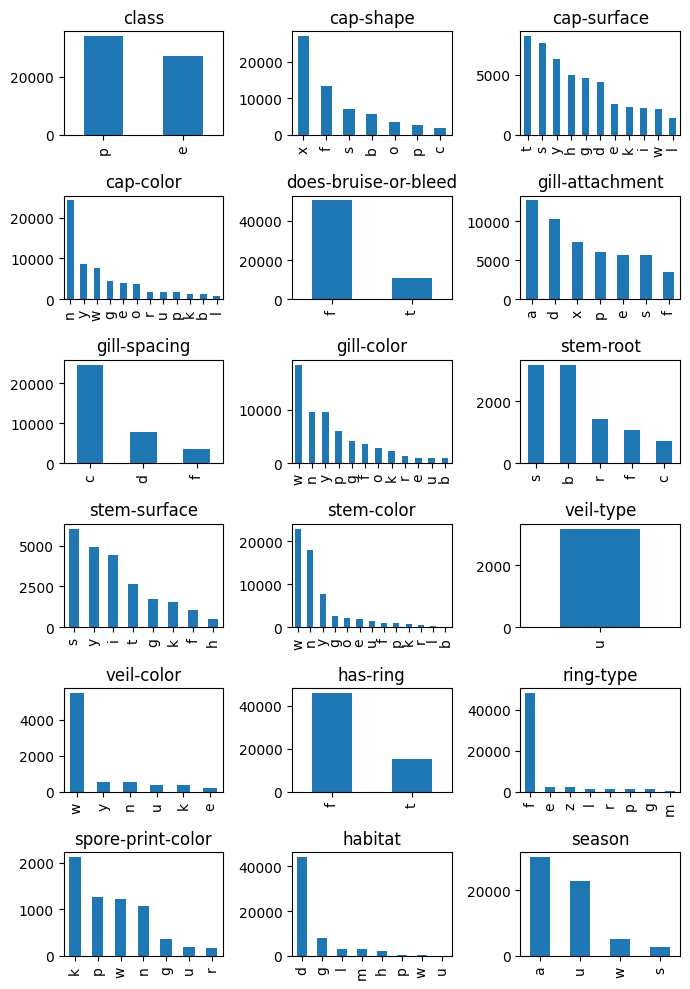

In [ ]:
#Distribution for numerical features
#mushroom_df.hist()

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(7,10))

num_feats = []
cat_feats = []

for feat in mushroom_df.columns:
  if mushroom_df[feat].nunique() > 15:
    num_feats.append(feat)
  else:
    cat_feats.append(feat)


for ax, feat in zip(axes.flatten(), cat_feats):
      mushroom_df[feat].value_counts().plot(kind='bar', ax=ax)
      ax.set_title(feat)

plt.tight_layout()
plt.show()

<ipython-input-10-7cdec5114d31>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mushroom_df.corr(), cmap="Blues")


<Axes: >

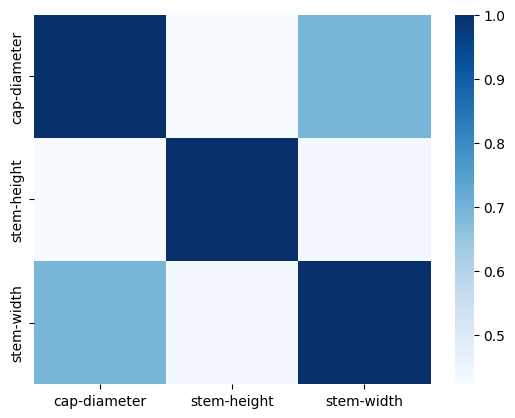

In [ ]:
sns.heatmap(mushroom_df.corr(), cmap="Blues")

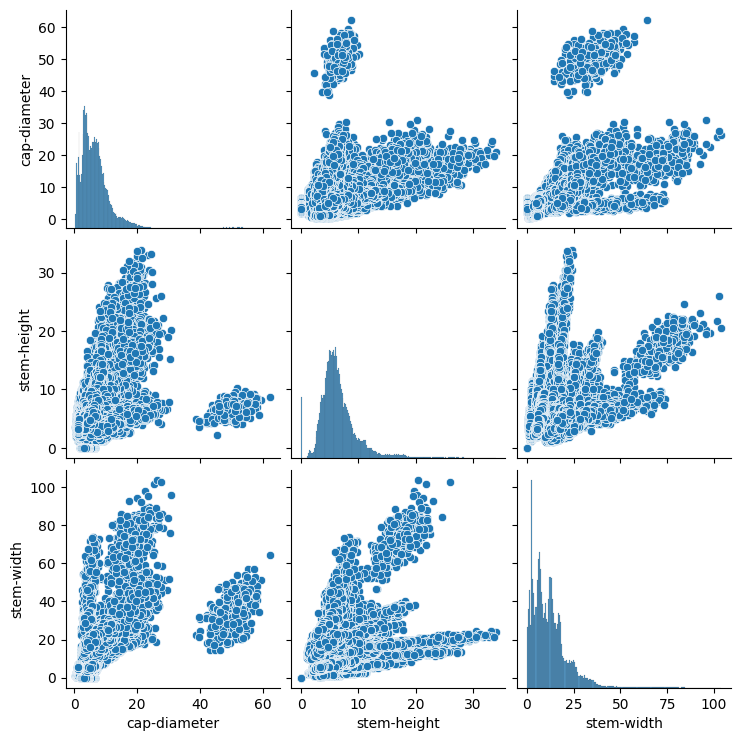

In [ ]:
sns.pairplot(mushroom_df)

['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
['class', 'cap-diameter', 'cap-shape', 'cap-color', 'does-bruise-or-bleed', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'has-ring', 'habitat', 'season']


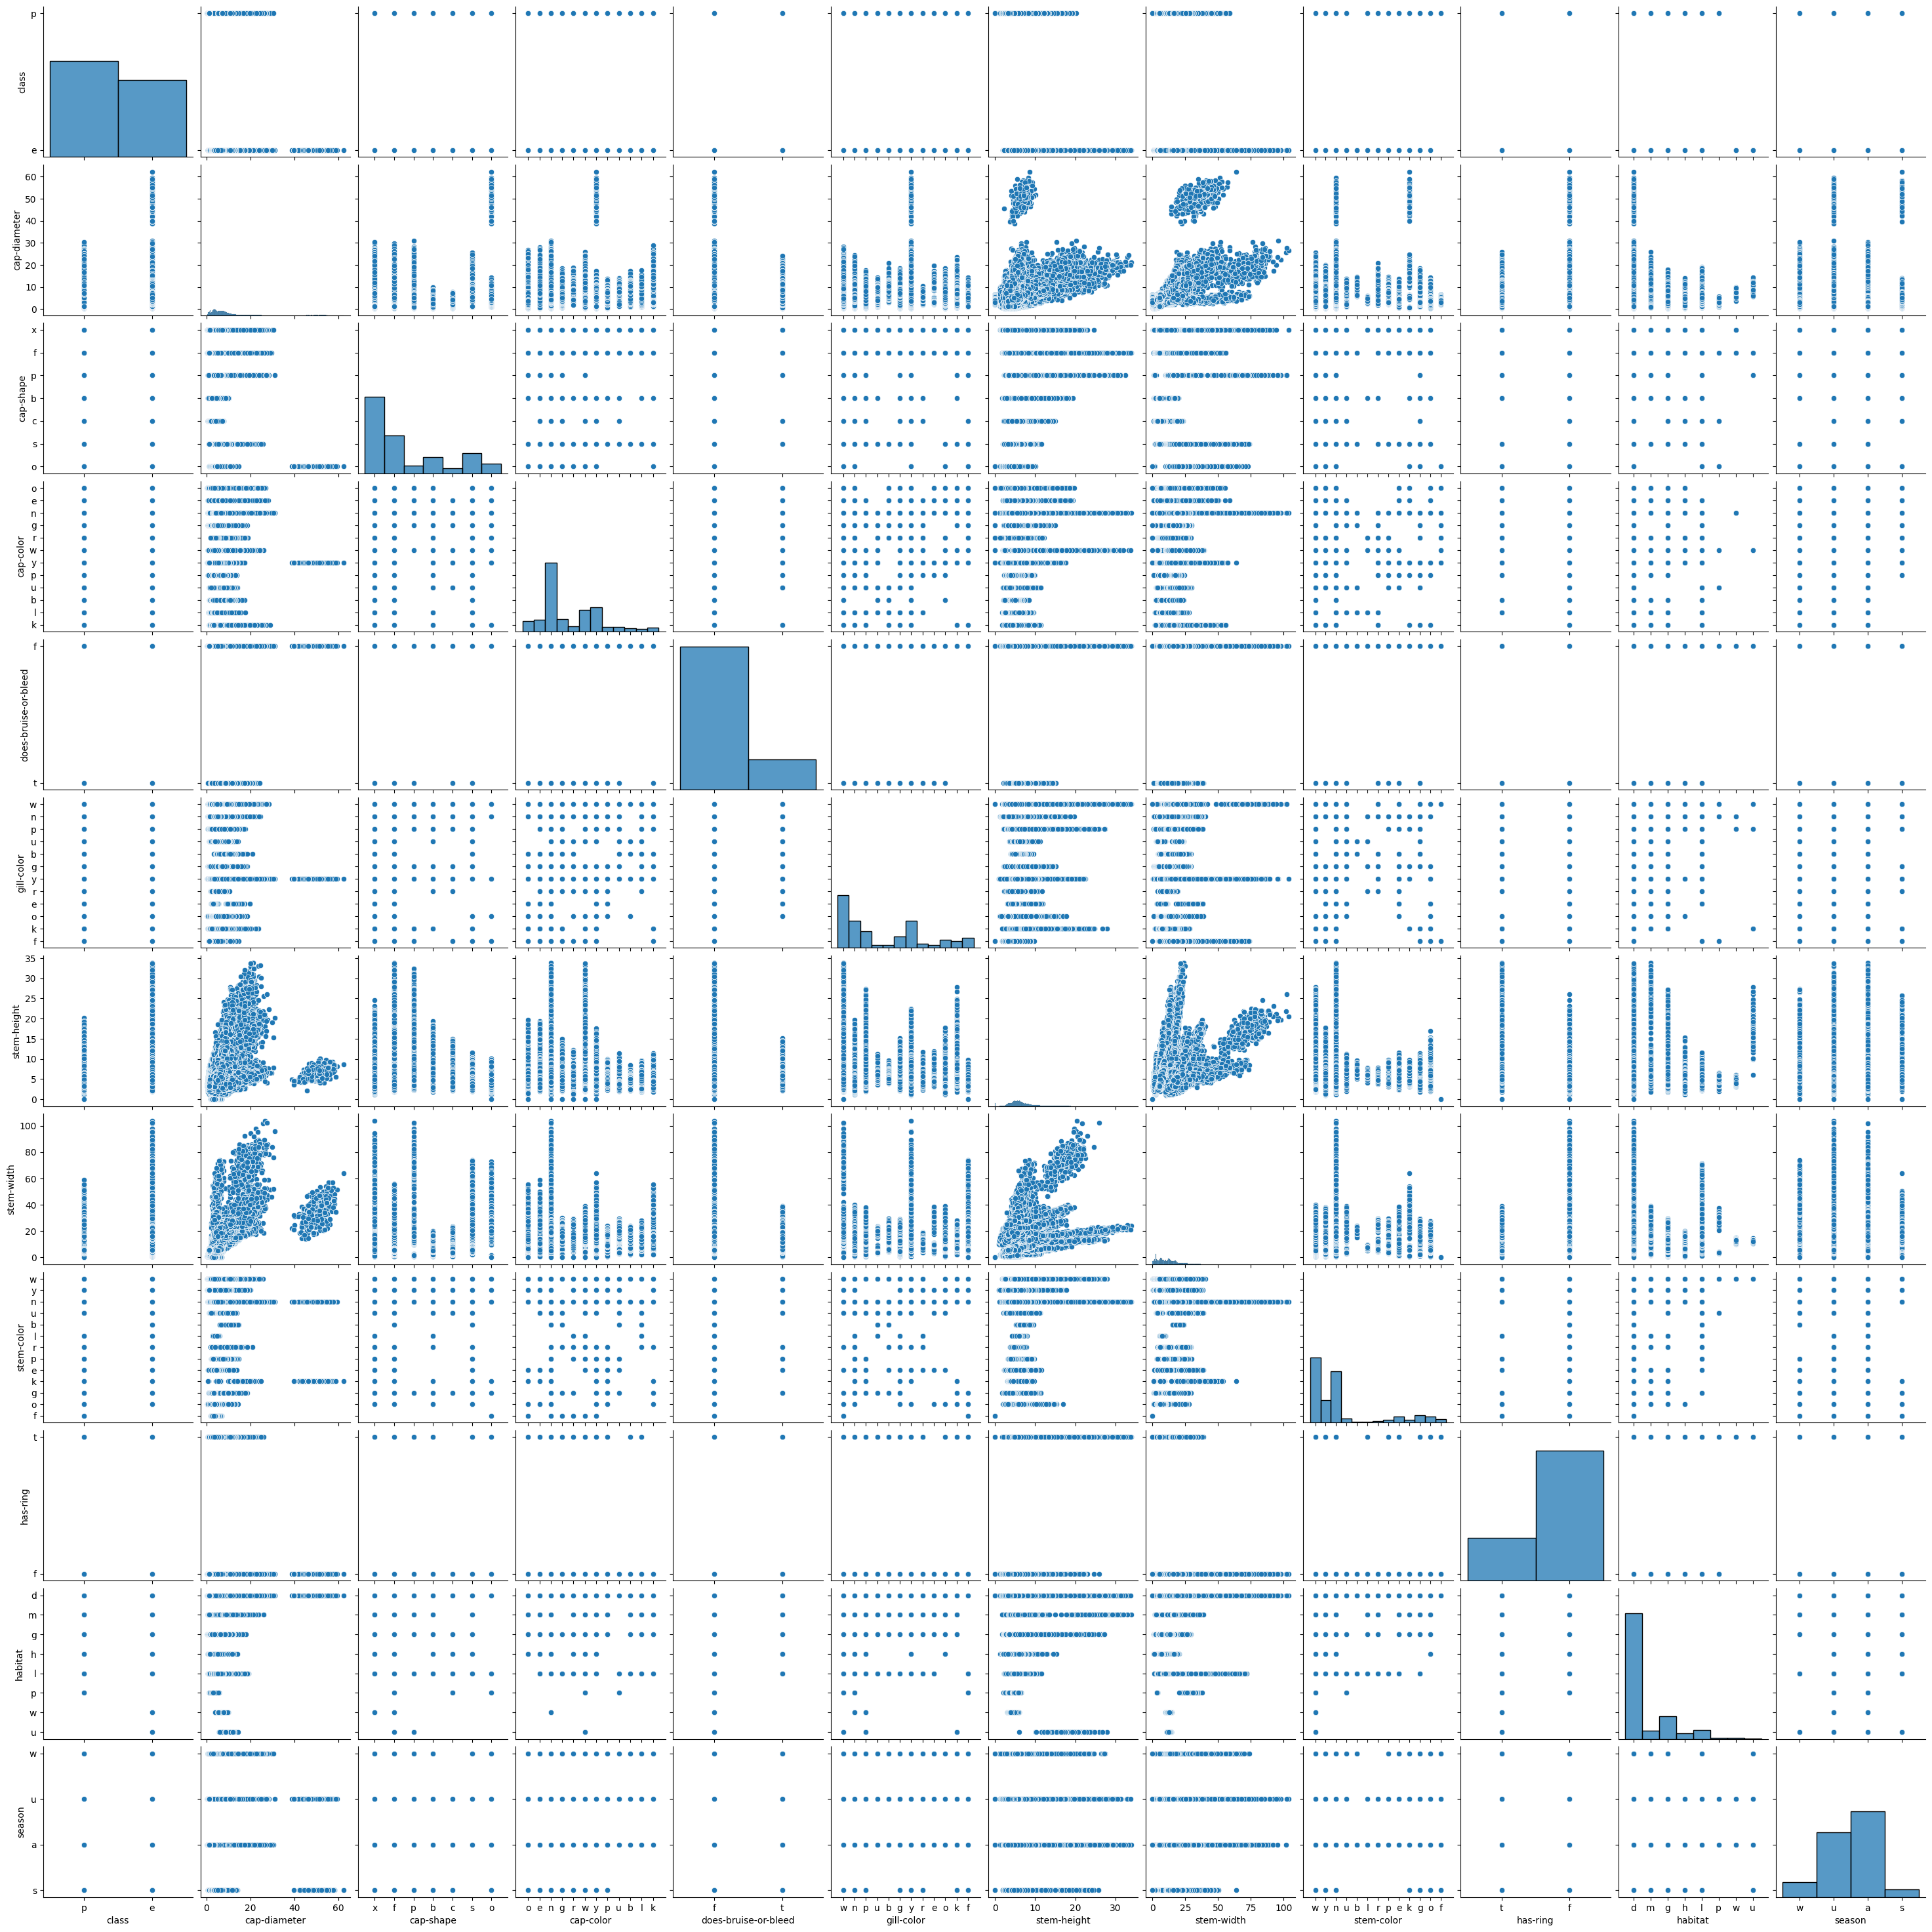

In [ ]:
vars = []
for col in mushroom_df.columns:
    vars.append(col)

high_na = ["gill-spacing", "stem-root", "stem-surface", "veil-color", "spore-print-color", "cap-surface", "gill-attachment", "veil-type", "ring-type"]
print(vars)

for item in high_na:
  vars.remove(item)
print(vars)
g = sns.pairplot(mushroom_df, vars=vars)

In [ ]:
# associations(mushroom_df, figsize=(15, 15))

Here we can see the two different correlations for season and for habitat:



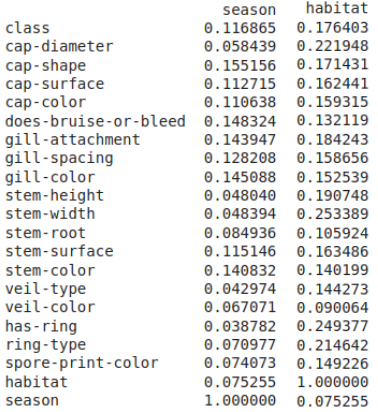


### Correlation for Season (NA cols)

*   gill-attachment; 4th
*   stem-root; 5th
*   gill-spacing; 6th
*   stem-surface; 8th
*   spore-print-color; 13th
*   ring-type; 14th
*   veil-color; 15th
*   veil-type; 19th


### Correlation for Habitat


*   ring-type; 4th
*   gill-attachment; 6th
*   stem-surface; 9th
*   gill-spacing; 12th
*   spore-print-color; 14th
*   veil-type; 15th
*   stem-root; 18th
*   veil-color; 19th


## Feature Engineering

### Removal of NA values

Looking to clean for NA values when the label is "season"

*    Remove veil-type column
*    Remove veil-color column
*    Remove ring-type column
*    Remove spore-print-color column
*    Remove stem-surface column
*    Remove NA values/use mode to input values for gill-spacing (25063) *Check with team*
*    Remove NA values/use mode to input values for stem-root (51538) *Check with team*
*    Remove NA values gill-attachment

In [ ]:
ssn_mushroom_df = mushroom_df.drop(['veil-type','veil-color','ring-type','spore-print-color',
                                    'stem-surface'], axis=1)
ssn_mushroom_df = ssn_mushroom_df[ssn_mushroom_df["gill-attachment"].notna()]

ssn_mushroom_df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-color,has-ring,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,w,t,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,w,t,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,w,t,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,w,t,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,w,t,d,w


In [ ]:
ssn_mushroom_df['gill-spacing'].value_counts()

c    20474
d     7060
f     3530
Name: gill-spacing, dtype: int64

In [ ]:
ssn_mushroom_df['stem-root'].value_counts()

b    2471
s    2118
r    1412
c     706
f     706
Name: stem-root, dtype: int64

In [ ]:
#Will create both options where the na values were removed (rem_na_...) and the one with highest value per column(may_...)
rem_na_mushroom_df = ssn_mushroom_df[ssn_mushroom_df["gill-spacing"].notna()]
rem_na_mushroom_df = rem_na_mushroom_df[rem_na_mushroom_df["stem-root"].notna()]
rem_na_mushroom_df = rem_na_mushroom_df[rem_na_mushroom_df["cap-surface"].notna()]
rem_na_mushroom_df = rem_na_mushroom_df.reset_index(drop=True)

#Replacing the NaNs with the mode per column
may_mushroom_df = ssn_mushroom_df.copy(deep=True)
may_mushroom_df['gill-spacing'] = may_mushroom_df['gill-spacing'].fillna('c')
may_mushroom_df['stem-root'] = may_mushroom_df['stem-root'].fillna('b')
may_mushroom_df['cap-surface'] = may_mushroom_df['cap-surface'].fillna('t')

In [ ]:
print(rem_na_mushroom_df.shape)
print(may_mushroom_df.shape)

(2471, 16)
(51185, 16)


In [ ]:
may_mushroom_df['cap-surface'].mode()


0    t
Name: cap-surface, dtype: object

# Encoding Features

Dropped NA Dataset Encoding

In [ ]:
# ordinally encode season for multiclass prediction
ordinal_encoder = OrdinalEncoder()
encoded = ordinal_encoder.fit_transform(rem_na_mushroom_df[['season']])
ordinal_encoder.categories_[0]
encoded_df = pd.DataFrame(encoded, columns=['season_num'], index=rem_na_mushroom_df.index)
encoded_df
rem_na_mushroom_df = pd.concat([encoded_df, rem_na_mushroom_df], axis=1)

rem_na_mushroom_df.drop(['season'], axis=1, inplace=True)

rem_na_mushroom_df


,season_num,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-color,has-ring,habitat
0,0.0,e,17.37,s,e,n,f,a,c,w,9.05,26.73,s,w,f,l
1,0.0,e,13.96,s,e,g,f,d,c,w,8.55,23.66,s,w,f,d
2,0.0,e,17.05,s,e,g,f,d,c,w,10.07,26.68,s,w,f,l
3,3.0,e,14.04,s,e,g,f,d,c,w,7.49,24.67,s,w,f,d
4,0.0,e,15.44,f,e,g,f,a,c,w,8.78,28.36,s,w,f,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,2.0,p,2.54,o,l,g,f,f,f,f,0.00,0.00,f,f,f,d
2467,3.0,p,3.13,o,l,g,f,f,f,f,0.00,0.00,f,f,f,d
2468,2.0,p,2.83,o,l,g,f,f,f,f,0.00,0.00,f,f,f,d
2469,1.0,p,3.83,o,l,g,f,f,f,f,0.00,0.00,f,f,f,d


In [ ]:
# binary encoding

# encode class, posionous = 1
rem_na_mushroom_df["class"] = rem_na_mushroom_df["class"].apply(lambda status: 0 if status == 'e' else 1)

# encode does bruise or bleed, bruise/bleeding = 1
rem_na_mushroom_df["does-bruise-or-bleed"] = rem_na_mushroom_df["does-bruise-or-bleed"].apply(lambda status: 0 if status == 'f' else 1)

# encode has ring, ring = 1
rem_na_mushroom_df["has-ring"] = rem_na_mushroom_df["has-ring"].apply(lambda status: 0 if status == 'f' else 1)


rem_na_mushroom_df


,season_num,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-color,has-ring,habitat
0,0.0,0,17.37,s,e,n,0,a,c,w,9.05,26.73,s,w,0,l
1,0.0,0,13.96,s,e,g,0,d,c,w,8.55,23.66,s,w,0,d
2,0.0,0,17.05,s,e,g,0,d,c,w,10.07,26.68,s,w,0,l
3,3.0,0,14.04,s,e,g,0,d,c,w,7.49,24.67,s,w,0,d
4,0.0,0,15.44,f,e,g,0,a,c,w,8.78,28.36,s,w,0,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,2.0,1,2.54,o,l,g,0,f,f,f,0.00,0.00,f,f,0,d
2467,3.0,1,3.13,o,l,g,0,f,f,f,0.00,0.00,f,f,0,d
2468,2.0,1,2.83,o,l,g,0,f,f,f,0.00,0.00,f,f,0,d
2469,1.0,1,3.83,o,l,g,0,f,f,f,0.00,0.00,f,f,0,d


In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(rem_na_mushroom_df[['cap-shape']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=rem_na_mushroom_df.index)
rem_na_mushroom_df = pd.concat([encoded_df, rem_na_mushroom_df], axis=1)

rem_na_mushroom_df.rename(columns = {'f':'cap-shape-flat', 'o':'cap-shape-others', 's':'cap-shape-sunken', 'x':'cap-shape-convex'}, inplace = True)

rem_na_mushroom_df.drop(['cap-shape'], axis=1, inplace=True)

rem_na_mushroom_df

,cap-shape-flat,cap-shape-others,cap-shape-sunken,cap-shape-convex,season_num,class,cap-diameter,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-color,has-ring,habitat
0,0.0,0.0,1.0,0.0,0.0,0,17.37,e,n,0,a,c,w,9.05,26.73,s,w,0,l
1,0.0,0.0,1.0,0.0,0.0,0,13.96,e,g,0,d,c,w,8.55,23.66,s,w,0,d
2,0.0,0.0,1.0,0.0,0.0,0,17.05,e,g,0,d,c,w,10.07,26.68,s,w,0,l
3,0.0,0.0,1.0,0.0,3.0,0,14.04,e,g,0,d,c,w,7.49,24.67,s,w,0,d
4,1.0,0.0,0.0,0.0,0.0,0,15.44,e,g,0,a,c,w,8.78,28.36,s,w,0,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,0.0,1.0,0.0,0.0,2.0,1,2.54,l,g,0,f,f,f,0.00,0.00,f,f,0,d
2467,0.0,1.0,0.0,0.0,3.0,1,3.13,l,g,0,f,f,f,0.00,0.00,f,f,0,d
2468,0.0,1.0,0.0,0.0,2.0,1,2.83,l,g,0,f,f,f,0.00,0.00,f,f,0,d
2469,0.0,1.0,0.0,0.0,1.0,1,3.83,l,g,0,f,f,f,0.00,0.00,f,f,0,d


In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(rem_na_mushroom_df[['cap-surface']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=rem_na_mushroom_df.index)
rem_na_mushroom_df = pd.concat([encoded_df, rem_na_mushroom_df], axis=1)

rem_na_mushroom_df.rename(columns = {'d':'cap-surface-d', 'e':'cap-surface-fleshy', 's':'cap-surface-smooth',
                                      'h':'cap-surface-shiny', 'l':'cap-surface-leathery', 't':'cap-surface-sticky'}, inplace = True)

rem_na_mushroom_df.drop(['cap-surface'], axis=1, inplace=True)

rem_na_mushroom_df

,cap-surface-d,cap-surface-fleshy,cap-surface-shiny,cap-surface-leathery,cap-surface-smooth,cap-surface-sticky,cap-shape-flat,cap-shape-others,cap-shape-sunken,cap-shape-convex,...,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-color,has-ring,habitat
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,a,c,w,9.05,26.73,s,w,0,l
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,d,c,w,8.55,23.66,s,w,0,d
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,d,c,w,10.07,26.68,s,w,0,l
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,d,c,w,7.49,24.67,s,w,0,d
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,a,c,w,8.78,28.36,s,w,0,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,f,f,f,0.00,0.00,f,f,0,d
2467,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,f,f,f,0.00,0.00,f,f,0,d
2468,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,f,f,f,0.00,0.00,f,f,0,d
2469,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,f,f,f,0.00,0.00,f,f,0,d


In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(rem_na_mushroom_df[['cap-color']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=rem_na_mushroom_df.index)
rem_na_mushroom_df = pd.concat([encoded_df, rem_na_mushroom_df], axis=1)

rem_na_mushroom_df.rename(columns = {'n':'cap-color-brown', 'o':'cap-color-orange', 'g':'cap-color-grey', 'r':'cap-color-green',
                                          'b':'cap-color-buff', 'e':'cap-color-red', 'y':'cap-color-yellow'}, inplace = True)

rem_na_mushroom_df.drop(['cap-color'], axis=1, inplace=True)

rem_na_mushroom_df

,cap-color-buff,cap-color-red,cap-color-grey,cap-color-brown,cap-color-orange,cap-color-green,cap-color-yellow,cap-surface-d,cap-surface-fleshy,cap-surface-shiny,...,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-color,has-ring,habitat
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,a,c,w,9.05,26.73,s,w,0,l
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,d,c,w,8.55,23.66,s,w,0,d
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,d,c,w,10.07,26.68,s,w,0,l
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,d,c,w,7.49,24.67,s,w,0,d
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,a,c,w,8.78,28.36,s,w,0,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,f,f,f,0.00,0.00,f,f,0,d
2467,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,f,f,f,0.00,0.00,f,f,0,d
2468,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,f,f,f,0.00,0.00,f,f,0,d
2469,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,f,f,f,0.00,0.00,f,f,0,d


In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(rem_na_mushroom_df[['gill-attachment']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=rem_na_mushroom_df.index)
rem_na_mushroom_df = pd.concat([encoded_df, rem_na_mushroom_df], axis=1)

rem_na_mushroom_df.rename(columns = {'f':'gill-attachment-none', 'a':'gill-attachment-adnate', 'd':'gill-attachment-decurrent',
                                      's':'gill-attachment-sinuate', 'x':'gill-attachment-adnexed'}, inplace = True)

rem_na_mushroom_df.drop(['gill-attachment'], axis=1, inplace=True)

rem_na_mushroom_df

,gill-attachment-adnate,gill-attachment-decurrent,gill-attachment-none,gill-attachment-sinuate,gill-attachment-adnexed,cap-color-buff,cap-color-red,cap-color-grey,cap-color-brown,cap-color-orange,...,cap-diameter,does-bruise-or-bleed,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-color,has-ring,habitat
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,17.37,0,c,w,9.05,26.73,s,w,0,l
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,13.96,0,c,w,8.55,23.66,s,w,0,d
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,17.05,0,c,w,10.07,26.68,s,w,0,l
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,14.04,0,c,w,7.49,24.67,s,w,0,d
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,15.44,0,c,w,8.78,28.36,s,w,0,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.54,0,f,f,0.00,0.00,f,f,0,d
2467,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.13,0,f,f,0.00,0.00,f,f,0,d
2468,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.83,0,f,f,0.00,0.00,f,f,0,d
2469,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.83,0,f,f,0.00,0.00,f,f,0,d


In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(rem_na_mushroom_df[['gill-spacing']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=rem_na_mushroom_df.index)
rem_na_mushroom_df = pd.concat([encoded_df, rem_na_mushroom_df], axis=1)

rem_na_mushroom_df.rename(columns = {'f':'gill-spacing-none', 'c':'gill-spacing-close', 'd':'gill-spacing-distant'}, inplace = True)

rem_na_mushroom_df.drop(['gill-spacing'], axis=1, inplace=True)

rem_na_mushroom_df

,gill-spacing-close,gill-spacing-distant,gill-spacing-none,gill-attachment-adnate,gill-attachment-decurrent,gill-attachment-none,gill-attachment-sinuate,gill-attachment-adnexed,cap-color-buff,cap-color-red,...,class,cap-diameter,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-root,stem-color,has-ring,habitat
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,17.37,0,w,9.05,26.73,s,w,0,l
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,13.96,0,w,8.55,23.66,s,w,0,d
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,17.05,0,w,10.07,26.68,s,w,0,l
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,14.04,0,w,7.49,24.67,s,w,0,d
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,15.44,0,w,8.78,28.36,s,w,0,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,2.54,0,f,0.00,0.00,f,f,0,d
2467,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,3.13,0,f,0.00,0.00,f,f,0,d
2468,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,2.83,0,f,0.00,0.00,f,f,0,d
2469,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,3.83,0,f,0.00,0.00,f,f,0,d


In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(rem_na_mushroom_df[['gill-color']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=rem_na_mushroom_df.index)
rem_na_mushroom_df = pd.concat([encoded_df, rem_na_mushroom_df], axis=1)

rem_na_mushroom_df.rename(columns = {'f':'gill-color-none', 'r':'gill-color-green', 'w':'gill-color-white', 'y':'gill-color-yellow'}, inplace = True)

rem_na_mushroom_df.drop(['gill-color'], axis=1, inplace=True)

rem_na_mushroom_df

,gill-color-none,gill-color-green,gill-color-white,gill-color-yellow,gill-spacing-close,gill-spacing-distant,gill-spacing-none,gill-attachment-adnate,gill-attachment-decurrent,gill-attachment-none,...,season_num,class,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,stem-root,stem-color,has-ring,habitat
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,17.37,0,9.05,26.73,s,w,0,l
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0,13.96,0,8.55,23.66,s,w,0,d
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0,17.05,0,10.07,26.68,s,w,0,l
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3.0,0,14.04,0,7.49,24.67,s,w,0,d
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,15.44,0,8.78,28.36,s,w,0,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2.0,1,2.54,0,0.00,0.00,f,f,0,d
2467,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3.0,1,3.13,0,0.00,0.00,f,f,0,d
2468,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2.0,1,2.83,0,0.00,0.00,f,f,0,d
2469,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1,3.83,0,0.00,0.00,f,f,0,d


In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(rem_na_mushroom_df[['stem-root']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=rem_na_mushroom_df.index)
rem_na_mushroom_df = pd.concat([encoded_df, rem_na_mushroom_df], axis=1)

rem_na_mushroom_df.rename(columns = {'f':'stem-root-f', 'b':'stem-root-bulbous', 's':'stem-root-swollen', 'r':'stem-root-rooted'}, inplace = True)

rem_na_mushroom_df.drop(['stem-root'], axis=1, inplace=True)

rem_na_mushroom_df

,stem-root-bulbous,stem-root-f,stem-root-rooted,stem-root-swollen,gill-color-none,gill-color-green,gill-color-white,gill-color-yellow,gill-spacing-close,gill-spacing-distant,...,cap-shape-convex,season_num,class,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,stem-color,has-ring,habitat
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0,17.37,0,9.05,26.73,w,0,l
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0,13.96,0,8.55,23.66,w,0,d
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0,17.05,0,10.07,26.68,w,0,l
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,3.0,0,14.04,0,7.49,24.67,w,0,d
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0,15.44,0,8.78,28.36,w,0,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1,2.54,0,0.00,0.00,f,0,d
2467,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1,3.13,0,0.00,0.00,f,0,d
2468,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1,2.83,0,0.00,0.00,f,0,d
2469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,3.83,0,0.00,0.00,f,0,d


In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(rem_na_mushroom_df[['stem-color']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=rem_na_mushroom_df.index)
rem_na_mushroom_df = pd.concat([encoded_df, rem_na_mushroom_df], axis=1)

rem_na_mushroom_df.rename(columns = {'f':'stem-color-none', 'n':'stem-color-brown', 'w':'stem-color-white'}, inplace = True)

rem_na_mushroom_df.drop(['stem-color'], axis=1, inplace=True)

rem_na_mushroom_df

,stem-color-none,stem-color-brown,stem-color-white,stem-root-bulbous,stem-root-f,stem-root-rooted,stem-root-swollen,gill-color-none,gill-color-green,gill-color-white,...,cap-shape-sunken,cap-shape-convex,season_num,class,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,has-ring,habitat
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0,17.37,0,9.05,26.73,0,l
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0,13.96,0,8.55,23.66,0,d
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0,17.05,0,10.07,26.68,0,l
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0,14.04,0,7.49,24.67,0,d
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0,15.44,0,8.78,28.36,0,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,1,2.54,0,0.00,0.00,0,d
2467,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,3.0,1,3.13,0,0.00,0.00,0,d
2468,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,1,2.83,0,0.00,0.00,0,d
2469,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1,3.83,0,0.00,0.00,0,d


In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(rem_na_mushroom_df[['habitat']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=rem_na_mushroom_df.index)
rem_na_mushroom_df = pd.concat([encoded_df, rem_na_mushroom_df], axis=1)

rem_na_mushroom_df.rename(columns = {'d':'habitat-woods', 'g':'habitat-grasses', 'l':'habitat-leaves', 'm':'habitat-meadows'}, inplace = True)

rem_na_mushroom_df.drop(['habitat'], axis=1, inplace=True)

rem_na_mushroom_df

,habitat-woods,habitat-grasses,habitat-leaves,habitat-meadows,stem-color-none,stem-color-brown,stem-color-white,stem-root-bulbous,stem-root-f,stem-root-rooted,...,cap-shape-others,cap-shape-sunken,cap-shape-convex,season_num,class,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,has-ring
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0,17.37,0,9.05,26.73,0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0,13.96,0,8.55,23.66,0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0,17.05,0,10.07,26.68,0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,0,14.04,0,7.49,24.67,0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,15.44,0,8.78,28.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,2.0,1,2.54,0,0.00,0.00,0
2467,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,3.0,1,3.13,0,0.00,0.00,0
2468,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,2.0,1,2.83,0,0.00,0.00,0
2469,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1,3.83,0,0.00,0.00,0


Imputed Data Encoding

In [ ]:
# ordinally encode season for multiclass prediction
ordinal_encoder = OrdinalEncoder()
encoded = ordinal_encoder.fit_transform(may_mushroom_df[['season']])
ordinal_encoder.categories_[0]
encoded_df = pd.DataFrame(encoded, columns=['season_num'], index=may_mushroom_df.index)
encoded_df
may_mushroom_df = pd.concat([encoded_df, may_mushroom_df], axis=1)

may_mushroom_df.drop(['season'], axis=1, inplace=True)

may_mushroom_df

,season_num,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-color,has-ring,habitat
0,3.0,p,15.26,x,g,o,f,e,c,w,16.95,17.09,s,w,t,d
1,2.0,p,16.60,x,g,o,f,e,c,w,17.99,18.19,s,w,t,d
2,3.0,p,14.07,x,g,o,f,e,c,w,17.80,17.74,s,w,t,d
3,3.0,p,14.17,f,h,e,f,e,c,w,15.77,15.98,s,w,t,d
4,3.0,p,14.64,x,h,o,f,e,c,w,16.53,17.20,s,w,t,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0.0,p,1.18,s,s,y,f,f,f,f,3.93,6.22,b,y,f,d
61065,0.0,p,1.27,f,s,y,f,f,f,f,3.18,5.43,b,y,f,d
61066,2.0,p,1.27,s,s,y,f,f,f,f,3.86,6.37,b,y,f,d
61067,2.0,p,1.24,f,s,y,f,f,f,f,3.56,5.44,b,y,f,d


In [ ]:
# binary encoding

# encode class, posionous = 1
may_mushroom_df["class"] = may_mushroom_df["class"].apply(lambda status: 0 if status == 'e' else 1)

# encode does bruise or bleed, bruise/bleeding = 1
may_mushroom_df["does-bruise-or-bleed"] = may_mushroom_df["does-bruise-or-bleed"].apply(lambda status: 0 if status == 'f' else 1)

# encode has ring, ring = 1
may_mushroom_df["has-ring"] = may_mushroom_df["has-ring"].apply(lambda status: 0 if status == 'f' else 1)

may_mushroom_df

,season_num,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-color,has-ring,habitat
0,3.0,1,15.26,x,g,o,0,e,c,w,16.95,17.09,s,w,1,d
1,2.0,1,16.60,x,g,o,0,e,c,w,17.99,18.19,s,w,1,d
2,3.0,1,14.07,x,g,o,0,e,c,w,17.80,17.74,s,w,1,d
3,3.0,1,14.17,f,h,e,0,e,c,w,15.77,15.98,s,w,1,d
4,3.0,1,14.64,x,h,o,0,e,c,w,16.53,17.20,s,w,1,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0.0,1,1.18,s,s,y,0,f,f,f,3.93,6.22,b,y,0,d
61065,0.0,1,1.27,f,s,y,0,f,f,f,3.18,5.43,b,y,0,d
61066,2.0,1,1.27,s,s,y,0,f,f,f,3.86,6.37,b,y,0,d
61067,2.0,1,1.24,f,s,y,0,f,f,f,3.56,5.44,b,y,0,d


In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(may_mushroom_df[['cap-shape']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=may_mushroom_df.index)
may_mushroom_df = pd.concat([encoded_df, may_mushroom_df], axis=1)

may_mushroom_df.rename(columns = {'f':'cap-shape-flat', 'o':'cap-shape-others', 's':'cap-shape-sunken',
                                  'x':'cap-shape-convex', 'b':'cap-shape-bell', 'c':'cap-shape-conical','p':'cap-shape-spherical'}, inplace = True)

may_mushroom_df.drop(['cap-shape'], axis=1, inplace=True)

may_mushroom_df

,cap-shape-bell,cap-shape-conical,cap-shape-flat,cap-shape-others,cap-shape-spherical,cap-shape-sunken,cap-shape-convex,season_num,class,cap-diameter,...,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-color,has-ring,habitat
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1,15.26,...,0,e,c,w,16.95,17.09,s,w,1,d
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1,16.60,...,0,e,c,w,17.99,18.19,s,w,1,d
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1,14.07,...,0,e,c,w,17.80,17.74,s,w,1,d
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1,14.17,...,0,e,c,w,15.77,15.98,s,w,1,d
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1,14.64,...,0,e,c,w,16.53,17.20,s,w,1,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1.18,...,0,f,f,f,3.93,6.22,b,y,0,d
61065,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.27,...,0,f,f,f,3.18,5.43,b,y,0,d
61066,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1,1.27,...,0,f,f,f,3.86,6.37,b,y,0,d
61067,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1,1.24,...,0,f,f,f,3.56,5.44,b,y,0,d


In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(may_mushroom_df[['cap-surface']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=may_mushroom_df.index)
may_mushroom_df = pd.concat([encoded_df, may_mushroom_df], axis=1)

may_mushroom_df.rename(columns = {'d':'cap-surface-d', 'e':'cap-surface-fleshy', 's':'cap-surface-smooth',
                                      'h':'cap-surface-shiny', 'l':'cap-surface-leathery', 't':'cap-surface-sticky',
                                  'g':'cap-surface-grooves', 'i':'cap-surface-fibrous', 'k':'cap-surface-silky',
                                  'w':'cap-surface-wrinkled', 'y':'cap-surface-scaly'}, inplace = True)

may_mushroom_df.drop(['cap-surface'], axis=1, inplace=True)

may_mushroom_df.columns

Index(['cap-surface-d', 'cap-surface-fleshy', 'cap-surface-grooves',
       'cap-surface-shiny', 'cap-surface-fibrous', 'cap-surface-silky',
       'cap-surface-leathery', 'cap-surface-smooth', 'cap-surface-sticky',
       'cap-surface-wrinkled', 'cap-surface-scaly', 'cap-shape-bell',
       'cap-shape-conical', 'cap-shape-flat', 'cap-shape-others',
       'cap-shape-spherical', 'cap-shape-sunken', 'cap-shape-convex',
       'season_num', 'class', 'cap-diameter', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-color', 'has-ring',
       'habitat'],
      dtype='object')

In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(may_mushroom_df[['cap-color']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=may_mushroom_df.index)
may_mushroom_df = pd.concat([encoded_df, may_mushroom_df], axis=1)

may_mushroom_df.rename(columns = {'n':'cap-color-brown', 'o':'cap-color-orange', 'g':'cap-color-grey', 'r':'cap-color-green',
                                          'b':'cap-color-buff', 'e':'cap-color-red', 'y':'cap-color-yellow',
                                  'k':'cap-color-black', 'l':'cap-color-blue', 'p':'cap-color-pink',
                                  'u':'cap-color-purple', 'w':'cap-color-white'}, inplace = True)

may_mushroom_df.drop(['cap-color'], axis=1, inplace=True)

may_mushroom_df.columns

Index(['cap-color-buff', 'cap-color-red', 'cap-color-grey', 'cap-color-black',
       'cap-color-blue', 'cap-color-brown', 'cap-color-orange',
       'cap-color-pink', 'cap-color-green', 'cap-color-purple',
       'cap-color-white', 'cap-color-yellow', 'cap-surface-d',
       'cap-surface-fleshy', 'cap-surface-grooves', 'cap-surface-shiny',
       'cap-surface-fibrous', 'cap-surface-silky', 'cap-surface-leathery',
       'cap-surface-smooth', 'cap-surface-sticky', 'cap-surface-wrinkled',
       'cap-surface-scaly', 'cap-shape-bell', 'cap-shape-conical',
       'cap-shape-flat', 'cap-shape-others', 'cap-shape-spherical',
       'cap-shape-sunken', 'cap-shape-convex', 'season_num', 'class',
       'cap-diameter', 'does-bruise-or-bleed', 'gill-attachment',
       'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root',
       'stem-color', 'has-ring', 'habitat'],
      dtype='object')

In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(may_mushroom_df[['gill-attachment']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=may_mushroom_df.index)
may_mushroom_df = pd.concat([encoded_df, may_mushroom_df], axis=1)

may_mushroom_df.rename(columns = {'f':'gill-attachment-none', 'a':'gill-attachment-adnate', 'd':'gill-attachment-decurrent',
                                      's':'gill-attachment-sinuate', 'x':'gill-attachment-adnexed', 'e':'gill-attachment-free',
                                      'p':'gill-attachment-pores'}, inplace = True)

may_mushroom_df.drop(['gill-attachment'], axis=1, inplace=True)

may_mushroom_df.columns

Index(['gill-attachment-adnate', 'gill-attachment-decurrent',
       'gill-attachment-free', 'gill-attachment-none', 'gill-attachment-pores',
       'gill-attachment-sinuate', 'gill-attachment-adnexed', 'cap-color-buff',
       'cap-color-red', 'cap-color-grey', 'cap-color-black', 'cap-color-blue',
       'cap-color-brown', 'cap-color-orange', 'cap-color-pink',
       'cap-color-green', 'cap-color-purple', 'cap-color-white',
       'cap-color-yellow', 'cap-surface-d', 'cap-surface-fleshy',
       'cap-surface-grooves', 'cap-surface-shiny', 'cap-surface-fibrous',
       'cap-surface-silky', 'cap-surface-leathery', 'cap-surface-smooth',
       'cap-surface-sticky', 'cap-surface-wrinkled', 'cap-surface-scaly',
       'cap-shape-bell', 'cap-shape-conical', 'cap-shape-flat',
       'cap-shape-others', 'cap-shape-spherical', 'cap-shape-sunken',
       'cap-shape-convex', 'season_num', 'class', 'cap-diameter',
       'does-bruise-or-bleed', 'gill-spacing', 'gill-color', 'stem-height',
       

In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(may_mushroom_df[['gill-spacing']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=may_mushroom_df.index)
may_mushroom_df = pd.concat([encoded_df, may_mushroom_df], axis=1)

may_mushroom_df.rename(columns = {'f':'gill-spacing-none', 'c':'gill-spacing-close', 'd':'gill-spacing-distant'}, inplace = True)

may_mushroom_df.drop(['gill-spacing'], axis=1, inplace=True)

may_mushroom_df

,gill-spacing-close,gill-spacing-distant,gill-spacing-none,gill-attachment-adnate,gill-attachment-decurrent,gill-attachment-free,gill-attachment-none,gill-attachment-pores,gill-attachment-sinuate,gill-attachment-adnexed,...,class,cap-diameter,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-root,stem-color,has-ring,habitat
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,15.26,0,w,16.95,17.09,s,w,1,d
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,16.60,0,w,17.99,18.19,s,w,1,d
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,14.07,0,w,17.80,17.74,s,w,1,d
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,14.17,0,w,15.77,15.98,s,w,1,d
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,14.64,0,w,16.53,17.20,s,w,1,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1.18,0,f,3.93,6.22,b,y,0,d
61065,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1.27,0,f,3.18,5.43,b,y,0,d
61066,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1.27,0,f,3.86,6.37,b,y,0,d
61067,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1.24,0,f,3.56,5.44,b,y,0,d


In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(may_mushroom_df[['gill-color']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=may_mushroom_df.index)
may_mushroom_df = pd.concat([encoded_df, may_mushroom_df], axis=1)

may_mushroom_df.rename(columns = {'f':'gill-color-none', 'r':'gill-color-green', 'w':'gill-color-white', 'y':'gill-color-yellow',
                                  'b':'gill-color-buff', 'e':'gill-color-red', 'g':'gill-color-grey', 'k':'gill-color-black',
                                  'n':'gill-color-brown', 'o':'gill-color-orange', 'p':'gill-color-pink'}, inplace = True)

may_mushroom_df.drop(['gill-color'], axis=1, inplace=True)

may_mushroom_df.columns

Index(['gill-color-buff', 'gill-color-red', 'gill-color-none',
       'gill-color-grey', 'gill-color-black', 'gill-color-brown',
       'gill-color-orange', 'gill-color-pink', 'gill-color-green', 'u',
       'gill-color-white', 'gill-color-yellow', 'gill-spacing-close',
       'gill-spacing-distant', 'gill-spacing-none', 'gill-attachment-adnate',
       'gill-attachment-decurrent', 'gill-attachment-free',
       'gill-attachment-none', 'gill-attachment-pores',
       'gill-attachment-sinuate', 'gill-attachment-adnexed', 'cap-color-buff',
       'cap-color-red', 'cap-color-grey', 'cap-color-black', 'cap-color-blue',
       'cap-color-brown', 'cap-color-orange', 'cap-color-pink',
       'cap-color-green', 'cap-color-purple', 'cap-color-white',
       'cap-color-yellow', 'cap-surface-d', 'cap-surface-fleshy',
       'cap-surface-grooves', 'cap-surface-shiny', 'cap-surface-fibrous',
       'cap-surface-silky', 'cap-surface-leathery', 'cap-surface-smooth',
       'cap-surface-sticky', 'cap-

In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(may_mushroom_df[['stem-root']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=may_mushroom_df.index)
may_mushroom_df = pd.concat([encoded_df, may_mushroom_df], axis=1)

may_mushroom_df.rename(columns = {'f':'stem-root-f', 'b':'stem-root-bulbous', 's':'stem-root-swollen', 'r':'stem-root-rooted', 'c':'stem-root-club'}, inplace = True)

may_mushroom_df.drop(['stem-root'], axis=1, inplace=True)

may_mushroom_df

,stem-root-bulbous,stem-root-club,stem-root-f,stem-root-rooted,stem-root-swollen,gill-color-buff,gill-color-red,gill-color-none,gill-color-grey,gill-color-black,...,cap-shape-convex,season_num,class,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,stem-color,has-ring,habitat
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,1,15.26,0,16.95,17.09,w,1,d
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1,16.60,0,17.99,18.19,w,1,d
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,1,14.07,0,17.80,17.74,w,1,d
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1,14.17,0,15.77,15.98,w,1,d
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,1,14.64,0,16.53,17.20,w,1,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1,1.18,0,3.93,6.22,y,0,d
61065,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1,1.27,0,3.18,5.43,y,0,d
61066,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2.0,1,1.27,0,3.86,6.37,y,0,d
61067,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2.0,1,1.24,0,3.56,5.44,y,0,d


In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(may_mushroom_df[['stem-color']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=may_mushroom_df.index)
may_mushroom_df = pd.concat([encoded_df, may_mushroom_df], axis=1)

may_mushroom_df.rename(columns = {'f':'stem-color-none', 'n':'stem-color-brown', 'w':'stem-color-white',
                                  'b':'stem-color-buff', 'e':'stem-color-red', 'g':'stem-color-grey', 'k':'stem-color-black',
                                  'l':'stem-color-blue', 'o':'stem-color-orange', 'p':'stem-color-pink', 'r':'stem-color-green', 'u':'stem-color-purple',
                                  'y':'stem-color-yellow'}, inplace = True)

may_mushroom_df.drop(['stem-color'], axis=1, inplace=True)

may_mushroom_df.columns

Index(['stem-color-buff', 'stem-color-red', 'stem-color-none',
       'stem-color-grey', 'stem-color-black', 'stem-color-blue',
       'stem-color-brown', 'stem-color-orange', 'stem-color-pink',
       'stem-color-green', 'stem-color-purple', 'stem-color-white',
       'stem-color-yellow', 'stem-root-bulbous', 'stem-root-club',
       'stem-root-f', 'stem-root-rooted', 'stem-root-swollen',
       'gill-color-buff', 'gill-color-red', 'gill-color-none',
       'gill-color-grey', 'gill-color-black', 'gill-color-brown',
       'gill-color-orange', 'gill-color-pink', 'gill-color-green',
       'stem-color-purple', 'gill-color-white', 'gill-color-yellow',
       'gill-spacing-close', 'gill-spacing-distant', 'gill-spacing-none',
       'gill-attachment-adnate', 'gill-attachment-decurrent',
       'gill-attachment-free', 'gill-attachment-none', 'gill-attachment-pores',
       'gill-attachment-sinuate', 'gill-attachment-adnexed', 'cap-color-buff',
       'cap-color-red', 'cap-color-grey', 'cap-

In [ ]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(may_mushroom_df[['habitat']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0], index=may_mushroom_df.index)
may_mushroom_df = pd.concat([encoded_df, may_mushroom_df], axis=1)

may_mushroom_df.rename(columns = {'d':'habitat-woods', 'g':'habitat-grasses', 'l':'habitat-leaves', 'm':'habitat-meadows', 'h':'habitat-heaths',
                                  'p':'habitat-paths', 'u':'habitat-urban', 'w':'habitat-waste', }, inplace = True)

may_mushroom_df.drop(['habitat'], axis=1, inplace=True)

may_mushroom_df

,habitat-woods,habitat-grasses,habitat-heaths,habitat-leaves,habitat-meadows,habitat-paths,habitat-urban,habitat-waste,stem-color-buff,stem-color-red,...,cap-shape-spherical,cap-shape-sunken,cap-shape-convex,season_num,class,cap-diameter,does-bruise-or-bleed,stem-height,stem-width,has-ring
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,1,15.26,0,16.95,17.09,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,1,16.60,0,17.99,18.19,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,1,14.07,0,17.80,17.74,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,1,14.17,0,15.77,15.98,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,1,14.64,0,16.53,17.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1,1.18,0,3.93,6.22,0
61065,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1.27,0,3.18,5.43,0
61066,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,1,1.27,0,3.86,6.37,0
61067,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1,1.24,0,3.56,5.44,0


In [ ]:
may_mushroom_df.columns

Index(['habitat-woods', 'habitat-grasses', 'habitat-heaths', 'habitat-leaves',
       'habitat-meadows', 'habitat-paths', 'habitat-urban', 'habitat-waste',
       'stem-color-buff', 'stem-color-red', 'stem-color-none',
       'stem-color-grey', 'stem-color-black', 'stem-color-blue',
       'stem-color-brown', 'stem-color-orange', 'stem-color-pink',
       'stem-color-green', 'stem-color-purple', 'stem-color-white',
       'stem-color-yellow', 'stem-root-bulbous', 'stem-root-club',
       'stem-root-f', 'stem-root-rooted', 'stem-root-swollen',
       'gill-color-buff', 'gill-color-red', 'gill-color-none',
       'gill-color-grey', 'gill-color-black', 'gill-color-brown',
       'gill-color-orange', 'gill-color-pink', 'gill-color-green',
       'stem-color-purple', 'gill-color-white', 'gill-color-yellow',
       'gill-spacing-close', 'gill-spacing-distant', 'gill-spacing-none',
       'gill-attachment-adnate', 'gill-attachment-decurrent',
       'gill-attachment-free', 'gill-attachment-no

# Data Splitting and Normalization

In [ ]:
# split into 60% training, 20% testing, 20% validation
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# it's splitting the IDs and then we get locations based on IDs. For DF with removed nas
for remna_train_index, remna_test_index in split.split(rem_na_mushroom_df, rem_na_mushroom_df.season_num):
    remna_train_df_all = rem_na_mushroom_df.iloc[remna_train_index]
    remna_test_df = rem_na_mushroom_df.iloc[remna_test_index]

# validation split for removed NA df
for remna_train_index, remna_val_index in split.split(remna_train_df_all, remna_train_df_all.season_num):
    remna_train_df = remna_train_df_all.iloc[remna_train_index]
    remna_val_df = remna_train_df_all.iloc[remna_val_index]

# it's splitting the IDs and then we get locations based on IDs. For DF with inputed data
for may_train_index, may_test_index in split.split(may_mushroom_df, may_mushroom_df.season_num):
    may_train_df_all = may_mushroom_df.iloc[may_train_index]
    may_test_df = may_mushroom_df.iloc[may_test_index]

# validation split for imputed df
for may_train_index, may_val_index in split.split(may_train_df_all, may_train_df_all.season_num):
    may_train_df = may_train_df_all.iloc[may_train_index]
    may_val_df = may_train_df_all.iloc[may_val_index]

In [ ]:
# normalize numeric features after split to avoid data leakage
num_features = ['cap-diameter', 'stem-height', 'stem-width']
df_list = [remna_train_df, remna_test_df, remna_val_df, may_train_df, may_test_df, may_val_df]

normalizer = MinMaxScaler()

norm_df = []
for df in df_list:
  # normalize
  normalizer.fit(df[num_features])
  normalized_data = normalizer.transform(df[num_features])

  # Back into a dataframe
  normalized_df = pd.DataFrame(normalized_data, columns=num_features,
                            index=df.index)

  # drop old numeric feature columns
  df_non_num = df.drop(num_features, axis=1)

  # add normalized columns back to full dataframe
  final_df = pd.concat([normalized_df, df_non_num], axis=1)

  # append dataframe to list of dataframes
  norm_df.append(final_df)

# rename dataframes
norm_remna_train_df = norm_df[0]
norm_remna_test_df = norm_df[1]
norm_remna_val_df = norm_df[2]
norm_may_train_df = norm_df[3]
norm_may_test_df = norm_df[4]
norm_may_val_df = norm_df[5]

In [ ]:
norm_remna_train_df.columns = norm_remna_train_df.columns.to_series().apply(lambda x: x.strip())
norm_remna_test_df.columns = norm_remna_test_df.columns.to_series().apply(lambda x: x.strip())


Define Features and Labels

In [ ]:
# features training data
X_train = norm_remna_train_df.loc[:, norm_remna_train_df.columns != 'season_num']
X_train_may = norm_may_train_df.loc[:, norm_may_train_df.columns != 'season_num']


# labels training data (target to predict is diagnosis column)
y_train = norm_remna_train_df[['season_num']]
y_train_may = norm_may_train_df[['season_num']]


# features testing data
X_test = norm_remna_test_df.loc[:, norm_remna_test_df.columns != 'season_num']
X_test_may = norm_may_test_df.loc[:, norm_may_test_df.columns != 'season_num']

# labels testing data (target to predict is diagnosis column)
y_test = norm_remna_test_df[['season_num']]
y_test_may = norm_may_test_df[['season_num']]

KNN on Dropped NA Dataset

    K_values  Accuracy  F1 Score
0        1.0  0.460606  0.460606
1        3.0  0.444444  0.444444
2        5.0  0.452525  0.452525
3        7.0  0.424242  0.424242
4        9.0  0.426263  0.426263
5       11.0  0.424242  0.424242
6       13.0  0.410101  0.410101
7       15.0  0.406061  0.406061
8       17.0  0.395960  0.395960
9       19.0  0.402020  0.402020
10      21.0  0.397980  0.397980
11      23.0  0.408081  0.408081
12      25.0  0.406061  0.406061
13      27.0  0.410101  0.410101
14      29.0  0.391919  0.391919
15      31.0  0.383838  0.383838
16      33.0  0.385859  0.385859
17      35.0  0.389899  0.389899
18      37.0  0.402020  0.402020
19      39.0  0.400000  0.400000
20      41.0  0.389899  0.389899
21      43.0  0.397980  0.397980
22      45.0  0.369697  0.369697
23      47.0  0.383838  0.383838
24      49.0  0.385859  0.385859


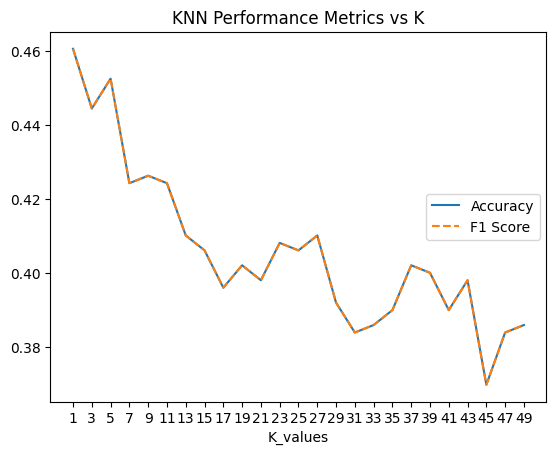

In [ ]:
# ignore pandas future warning
import warnings
warnings.filterwarnings("ignore")

# create empty dataframe to store values for graphing
graph_df = pd.DataFrame({'K_values':[], 'Accuracy':[], 'F1 Score':[]})

# test odd k values in range 1 through 19 to find best k value (odd numbers avoid ties)
for k_values in range(1, 50, 2):

  # intialize knn object with the k values
  knn = KNeighborsClassifier(n_neighbors=k_values)

  # have knn memorize training data
  knn.fit(X_train,np.ravel(y_train, order='C'))

  # get prediction arrays
  y_pred = knn.predict(X_test)

  # calculate metrics
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='micro')

  # store data in df
  graph_df = graph_df.append({'K_values':k_values,'Accuracy':accuracy,'F1 Score':f1},ignore_index=True)

# output the graph df
print(graph_df)

# plot accuracy, f1 on a single graph
fig, ax = plt.subplots(1)
graph_df.plot(ax=ax, x='K_values', y='Accuracy', label='Accuracy')
graph_df.plot(ax=ax, x='K_values', y='F1 Score', label='F1 Score', linestyle='dashed')
plt.xticks(range(1,50,2))
ax.legend(loc='right')
plt.title('KNN Performance Metrics vs K')
plt.show()

The k value with the highest F1 score is 1.

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train,np.ravel(y_train,order='C'))
y_pred = knn_clf.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(matrix)
report = classification_report(y_test, y_pred)
print('Classification Report:',)
print(report)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
f1 = f1_score(y_test, y_pred, average='micro')
print('F1 score', f1)

Confusion Matrix:
[[116   3  72  24]
 [  9   5   9  14]
 [ 76   9  80   7]
 [ 28  13   3  27]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.54      0.52       215
         1.0       0.17      0.14      0.15        37
         2.0       0.49      0.47      0.48       172
         3.0       0.38      0.38      0.38        71

    accuracy                           0.46       495
   macro avg       0.38      0.38      0.38       495
weighted avg       0.46      0.46      0.46       495

Accuracy: 0.46060606060606063
F1 score 0.46060606060606063


In [ ]:
norm_remna_train_df['season_num'].value_counts()

0.0    684
2.0    550
3.0    229
1.0    117
Name: season_num, dtype: int64

There is class imbalance, so upsampling of 1 (spring) and 3 (winter) will be done to match 2's (summer) 550, and 0 (autumn) will be downsampled to 550 to see if the F1 score improves with balanced classes.

In [ ]:
# upsampling

# separate minority class
one = norm_remna_train_df[norm_remna_train_df['season_num'] == 1]
# exclude minority class from other classes
not_one = norm_remna_train_df[norm_remna_train_df['season_num'] != 1]
# upsample minority class
one_upsampled = resample(one, random_state=42,n_samples=550,replace=True)
# concatenate upsampled dataframe
df_upsampled = pd.concat([one_upsampled, not_one])

# separate minority class
three = df_upsampled[df_upsampled['season_num'] == 3]
# exclude minority class from other classes
not_three = df_upsampled[df_upsampled['season_num'] != 3]
# upsample minority class
three_upsampled = resample(three, random_state=42,n_samples=550,replace=True)
# concatenate upsampled dataframe
df_upsampled = pd.concat([three_upsampled, not_three])

# downsampling
zero = df_upsampled[df_upsampled['season_num'] == 0]
# exclude majority class from other classes
not_zero = df_upsampled[df_upsampled['season_num'] != 0]
# downsample majority
df_downsampled = resample(zero,replace=True,n_samples=550,random_state=42)
# concatenate upsampled dataframe
df_sampled = pd.concat([df_downsampled, not_zero])

df_sampled['season_num'].value_counts()

0.0    550
3.0    550
1.0    550
2.0    550
Name: season_num, dtype: int64

In [ ]:
# redefine features and labels
X_train_sampled = df_sampled.loc[:, df_sampled.columns != 'season_num']
y_train_sampled = df_sampled[['season_num']]

KNN on Balanced Class Dropped NA Data

    K_values  Accuracy  F1 Score
0        1.0  0.460606  0.460606
1        3.0  0.450505  0.450505
2        5.0  0.448485  0.448485
3        7.0  0.440404  0.440404
4        9.0  0.430303  0.430303
5       11.0  0.430303  0.430303
6       13.0  0.416162  0.416162
7       15.0  0.400000  0.400000
8       17.0  0.404040  0.404040
9       19.0  0.400000  0.400000
10      21.0  0.395960  0.395960
11      23.0  0.395960  0.395960
12      25.0  0.393939  0.393939
13      27.0  0.395960  0.395960
14      29.0  0.402020  0.402020
15      31.0  0.395960  0.395960
16      33.0  0.393939  0.393939
17      35.0  0.391919  0.391919
18      37.0  0.381818  0.381818
19      39.0  0.383838  0.383838
20      41.0  0.381818  0.381818
21      43.0  0.385859  0.385859
22      45.0  0.397980  0.397980
23      47.0  0.397980  0.397980
24      49.0  0.408081  0.408081


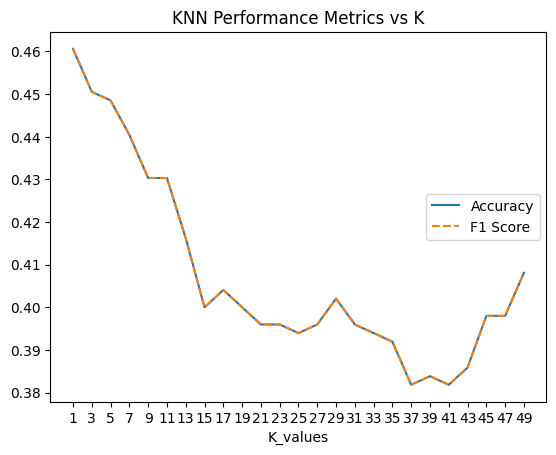

In [ ]:
# ignore pandas future warning
import warnings
warnings.filterwarnings("ignore")

# create empty dataframe to store values for graphing
graph_df = pd.DataFrame({'K_values':[], 'Accuracy':[], 'F1 Score':[]})

# test odd k values in range 1 through 19 to find best k value (odd numbers avoid ties)
for k_values in range(1, 50, 2):

  # intialize knn object with the k values
  knn = KNeighborsClassifier(n_neighbors=k_values)

  # have knn memorize training data
  knn.fit(X_train_sampled,np.ravel(y_train_sampled, order='C'))

  # get prediction arrays
  y_pred = knn.predict(X_test)

  # calculate metrics
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='micro')

  # store data in df
  graph_df = graph_df.append({'K_values':k_values,'Accuracy':accuracy,'F1 Score':f1},ignore_index=True)

# output the graph df
print(graph_df)

# plot accuracy, f1 on a single graph
fig, ax = plt.subplots(1)
graph_df.plot(ax=ax, x='K_values', y='Accuracy', label='Accuracy')
graph_df.plot(ax=ax, x='K_values', y='F1 Score', label='F1 Score', linestyle='dashed')
plt.xticks(range(1,50,2))
ax.legend(loc='right')
plt.title('KNN Performance Metrics vs K')
plt.show()

Up and downsampling the training data did not improve the F1 score.

KNN on Imputed Data

    K_values  Accuracy  F1 Score
0        1.0  0.515288  0.515288
1        3.0  0.517144  0.517144
2        5.0  0.517827  0.517827
3        7.0  0.516167  0.516167
4        9.0  0.523493  0.523493
5       11.0  0.519781  0.519781
6       13.0  0.521051  0.521051
7       15.0  0.520270  0.520270
8       17.0  0.521442  0.521442
9       19.0  0.523982  0.523982
10      21.0  0.521637  0.521637
11      23.0  0.525056  0.525056
12      25.0  0.521833  0.521833
13      27.0  0.520660  0.520660
14      29.0  0.524861  0.524861
15      31.0  0.521051  0.521051
16      33.0  0.518316  0.518316
17      35.0  0.521540  0.521540
18      37.0  0.521344  0.521344
19      39.0  0.520953  0.520953
20      41.0  0.520758  0.520758
21      43.0  0.518902  0.518902
22      45.0  0.516558  0.516558
23      47.0  0.513725  0.513725
24      49.0  0.512943  0.512943


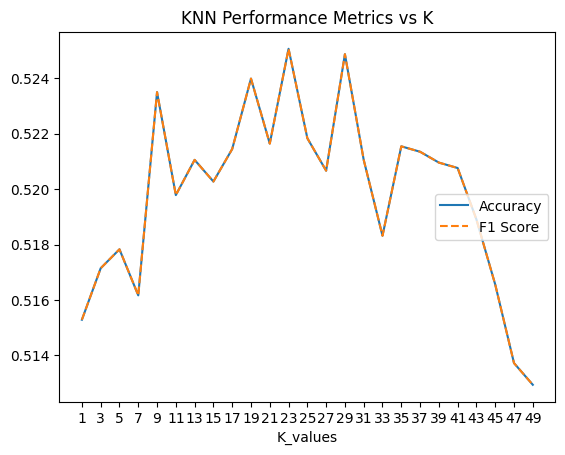

In [ ]:
# ignore pandas future warning
import warnings
warnings.filterwarnings("ignore")

# create empty dataframe to store values for graphing
graph_df = pd.DataFrame({'K_values':[], 'Accuracy':[], 'F1 Score':[]})

# test odd k values in range 1 through 19 to find best k value (odd numbers avoid ties)
for k_values in range(1, 50, 2):

  # intialize knn object with the k values
  knn = KNeighborsClassifier(n_neighbors=k_values)

  # have knn memorize training data
  knn.fit(X_train_may,np.ravel(y_train_may, order='C'))

  # get prediction arrays
  y_pred = knn.predict(X_test_may)

  # calculate metrics
  accuracy = accuracy_score(y_test_may, y_pred)
  f1 = f1_score(y_test_may, y_pred, average = 'micro')

  # store data in df
  graph_df = graph_df.append({'K_values':k_values,'Accuracy':accuracy,'F1 Score':f1},ignore_index=True)

# output the graph df
print(graph_df)

# plot accuracy, f1 on a single graph
fig, ax = plt.subplots(1)
graph_df.plot(ax=ax, x='K_values', y='Accuracy', label='Accuracy')
graph_df.plot(ax=ax, x='K_values', y='F1 Score', label='F1 Score', linestyle='dashed')
plt.xticks(range(1,50,2))
ax.legend(loc='right')
plt.title('KNN Performance Metrics vs K')
plt.show()

The k value with the highest F1 score is 23.

In [ ]:
knn_clf2=KNeighborsClassifier(n_neighbors=23)
knn_clf2.fit(X_train_may,np.ravel(y_train_may,order='C'))
y_pred = knn_clf2.predict(X_test_may)

In [ ]:
matrix = confusion_matrix(y_test_may, y_pred)
print('Confusion Matrix:')
print(matrix)
report = classification_report(y_test_may, y_pred)
print('Classification Report:',)
print (report)
accuracy = accuracy_score(y_test_may, y_pred)
print('Accuracy:', accuracy)
f1 = f1_score(y_test_may, y_pred, average='micro')
print('F1 score', f1)

Confusion Matrix:
[[2849   71 1821  308]
 [  91  184   98   40]
 [1741  104 1997   96]
 [ 334   36  122  345]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.56      0.57      5049
         1.0       0.47      0.45      0.46       413
         2.0       0.49      0.51      0.50      3938
         3.0       0.44      0.41      0.42       837

    accuracy                           0.53     10237
   macro avg       0.49      0.48      0.49     10237
weighted avg       0.52      0.53      0.52     10237

Accuracy: 0.5250561687994529
F1 score 0.5250561687994529


In [ ]:
norm_may_train_df['season_num'].value_counts()

0.0    16157
2.0    12601
3.0     2679
1.0     1321
Name: season_num, dtype: int64

There is a large class imbalance for season, so 1 (spring) and 3 (winter) will be upsampled to 2's (summer) 12601, and 0 (autumn) will be downsampled to 12601

In [ ]:
# upsampling

# separate minority class
one = norm_may_train_df[norm_may_train_df['season_num'] == 1]
# exclude minority class from other classes
not_one = norm_may_train_df[norm_may_train_df['season_num'] != 1]
# upsample minority class
one_upsampled = resample(one, random_state=42,n_samples=12601,replace=True)
# concatenate upsampled dataframe
df_upsampled = pd.concat([one_upsampled, not_one])

# separate minority class
three = df_upsampled[df_upsampled['season_num'] == 3]
# exclude minority class from other classes
not_three = df_upsampled[df_upsampled['season_num'] != 3]
# upsample minority class
three_upsampled = resample(three, random_state=42,n_samples=12601,replace=True)
# concatenate upsampled dataframe
df_upsampled = pd.concat([three_upsampled, not_three])

# downsampling
zero = df_upsampled[df_upsampled['season_num'] == 0]
# exclude majority class from other classes
not_zero = df_upsampled[df_upsampled['season_num'] != 0]
# downsample majority
df_downsampled = resample(zero,replace=True,n_samples=12601,random_state=42)
# concatenate upsampled dataframe
df_sampled_may = pd.concat([df_downsampled, not_zero])

df_sampled_may['season_num'].value_counts()

0.0    12601
3.0    12601
1.0    12601
2.0    12601
Name: season_num, dtype: int64

In [ ]:
# redefine features and labels
X_train_sampled_may = df_sampled_may.loc[:, df_sampled_may.columns != 'season_num']
y_train_sampled_may = df_sampled_may[['season_num']]

KNN on Balanced Class Imputed Data

    K_values  Accuracy  F1 Score
0        1.0  0.522809  0.522809
1        3.0  0.524275  0.524275
2        5.0  0.520074  0.520074
3        7.0  0.520758  0.520758
4        9.0  0.519195  0.519195
5       11.0  0.522223  0.522223
6       13.0  0.523591  0.523591
7       15.0  0.524470  0.524470
8       17.0  0.522907  0.522907
9       19.0  0.518609  0.518609
10      21.0  0.518218  0.518218
11      23.0  0.522321  0.522321
12      25.0  0.523689  0.523689
13      27.0  0.523102  0.523102
14      29.0  0.522907  0.522907
15      31.0  0.520172  0.520172
16      33.0  0.521149  0.521149
17      35.0  0.519293  0.519293
18      37.0  0.518609  0.518609
19      39.0  0.516851  0.516851
20      41.0  0.519097  0.519097
21      43.0  0.517730  0.517730
22      45.0  0.515092  0.515092
23      47.0  0.513920  0.513920
24      49.0  0.513236  0.513236


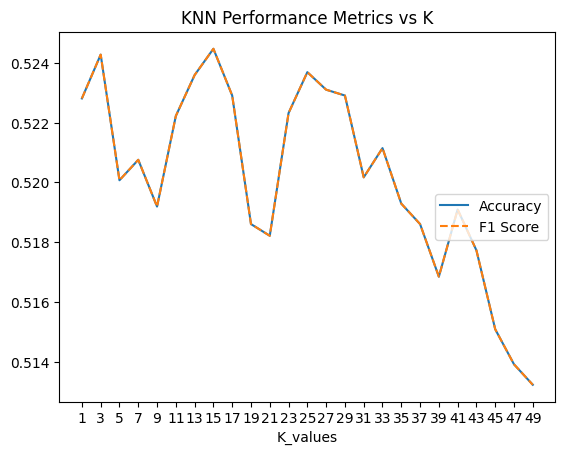

In [ ]:
# ignore pandas future warning
import warnings
warnings.filterwarnings("ignore")

# create empty dataframe to store values for graphing
graph_df = pd.DataFrame({'K_values':[], 'Accuracy':[], 'F1 Score':[]})

# test odd k values in range 1 through 19 to find best k value (odd numbers avoid ties)
for k_values in range(1, 50, 2):

  # intialize knn object with the k values
  knn = KNeighborsClassifier(n_neighbors=k_values)

  # have knn memorize training data
  knn.fit(X_train_sampled_may,np.ravel(y_train_sampled_may, order='C'))

  # get prediction arrays
  y_pred = knn.predict(X_test_may)

  # calculate metrics
  accuracy = accuracy_score(y_test_may, y_pred)
  f1 = f1_score(y_test_may, y_pred, average = 'micro')

  # store data in df
  graph_df = graph_df.append({'K_values':k_values,'Accuracy':accuracy,'F1 Score':f1},ignore_index=True)

# output the graph df
print(graph_df)

# plot accuracy, f1 on a single graph
fig, ax = plt.subplots(1)
graph_df.plot(ax=ax, x='K_values', y='Accuracy', label='Accuracy')
graph_df.plot(ax=ax, x='K_values', y='F1 Score', label='F1 Score', linestyle='dashed')
plt.xticks(range(1,50,2))
ax.legend(loc='right')
plt.title('KNN Performance Metrics vs K')
plt.show()

Up and downsampling the training data surpringsly did not improve the F1 score. The highest F1 score was to 0.524470 for k=15.